<a href="https://colab.research.google.com/github/anirudha233/python-basics/blob/main/notebooks/05_Capstone_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Full Capstone Assignment — Python for Earth System & Remote Sensing**

This Capstone Assignment integrates all major skills from Notebooks **01 → 04**:

- Python fundamentals  
- Lists, loops, conditions  
- Functions & plotting  
- NumPy  
- xarray  
- NetCDF  
- Scientific interpretation  

**This assignment is designed to be completed over multiple days** and tests understanding, reasoning, coding clarity, and scientific interpretation.


---
# **Section 0 — Setup (Required)**

Run the cell below to import the scientific Python libraries you need for the assignment.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
%matplotlib inline

---
# **Section 1 — Python Fundamentals (Notebook 01)**

### **Q1.1 — Arithmetic & Variables**  
Create:
- `a = 12`
- `b = 4.7`
- `c = -3`

Compute and print:
1. `a + b`
2. `a * c`
3. `(a + b) / c`

Use f-strings to print meaningful messages.


In [4]:
a = 12
b = 4.7
c = -3

print(f"a + b = {a + b}")
print(f"a / b = {a/b}")
print(f"a * c = {a * c}")
print(f"(a + b) / c = {(a + b) / c}")

a + b = 16.7
a / b = 2.553191489361702
a * c = -36
(a + b) / c = -5.566666666666666


### **Q1.2 — Basic Statistics**  
Given:
```python
sst = [27.9, 28.0, 28.4, 28.6, 28.8, 29.1, 28.7, 28.3, 27.8]
```

Compute:
- Mean  
- Median  
- Minimum  
- Maximum  
- Standard deviation  

Print with clear labels.


In [8]:
# Q1.2
import numpy as np
sst = [27.9,28.0,28.4,28.6,28.8,29.1,28.7,28.3,27.8]
print(f"Mean = {np.mean(sst)}")
print(f"Median = {np.median(sst)}")
print(f"Minimum = {np.min(sst)}")
print(f"Maximum = {np.max(sst)}")




Mean = 28.400000000000002
Median = 28.4
Minimum = 27.8
Maximum = 29.1


---
# **Section 2 — Lists, Loops, and Conditions (Notebook 02)**

### **Q2.1 — Day-wise SST Printing**  
Using the `sst` list from Q1.2, print:

```
Day 1: value
Day 2: value
...
```


In [9]:
# Q2.1
for i, sst_value in enumerate(sst):
    print(f"Day {i+1}: {sst_value}")

Day 1: 27.9
Day 2: 28.0
Day 3: 28.4
Day 4: 28.6
Day 5: 28.8
Day 6: 29.1
Day 7: 28.7
Day 8: 28.3
Day 9: 27.8


### **Q2.2 — Classification**  
Classify each SST into:
- **HOT** (> 29)  
- **WARM** (28–29)  
- **NORMAL** (< 28)

Print classification for each day.  
At the end, print counts for each category.


In [10]:
# Q2.2
for i, sst_value in enumerate(sst):
    if sst_value > 29:
        print(f"Day {i+1}: HOT")

    elif sst_value >= 28:
        print(f"Day {i+1}: WARM")
    else:
        print(f"Day {i+1}: NORMAL")

print(f"HOT: {len([1 for sst_value in sst if sst_value > 29])}")

Day 1: NORMAL
Day 2: WARM
Day 3: WARM
Day 4: WARM
Day 5: WARM
Day 6: HOT
Day 7: WARM
Day 8: WARM
Day 9: NORMAL
HOT: 1


### **Q2.3 — Rolling 3-day Mean**  
Compute a 3-day rolling mean using loops (without NumPy).  
Example output:
```
Mean Day1-3: ...
Mean Day2-4: ...
...
```


In [12]:
# Q2.3
for i in range(len(sst) - 2):
    mean = np.mean(sst[i:i+3])
    print(f"Mean Day{i+1}-{i+3}: {mean}")


Mean Day1-3: 28.099999999999998
Mean Day2-4: 28.333333333333332
Mean Day3-5: 28.599999999999998
Mean Day4-6: 28.833333333333332
Mean Day5-7: 28.86666666666667
Mean Day6-8: 28.7
Mean Day7-9: 28.266666666666666


---
# **Section 3 — Functions, Arrays, and Plotting (Notebook 03)**

### **Q3.1 — Function: Celsius → Kelvin**  
Define:
```python
def c_to_k(T_c):
    ...
```
Test on 5 sample values.


In [21]:
# Q3.1
T_c=[25,27,28.5,30,32]
def c_to_k(T_c):
    return T_c + 273.15

# Test on 5 sample values
for temp_c_value in T_c:
    print(f"Celsius: {temp_c_value:.1f}, Kelvin: {c_to_k(temp_c_value):.2f}")

Celsius: 25.0, Kelvin: 298.15
Celsius: 27.0, Kelvin: 300.15
Celsius: 28.5, Kelvin: 301.65
Celsius: 30.0, Kelvin: 303.15
Celsius: 32.0, Kelvin: 305.15


### **Q3.2 — Function: Anomaly Computation**  
Define:
```python
def compute_anomaly(arr):
    ...
```
Return array − mean.  
Test using `sst`.


In [22]:
# Q3.2
def compute_anomaly(arr):
    return arr - np.mean(arr)

sst_anomaly = compute_anomaly(sst)
print(sst_anomaly)


[-5.00000000e-01 -4.00000000e-01 -3.55271368e-15  2.00000000e-01
  4.00000000e-01  7.00000000e-01  3.00000000e-01 -1.00000000e-01
 -6.00000000e-01]


### **Q3.3 — Convert to NumPy + Plot**  

1. Convert `sst` to a NumPy array  
2. Compute anomalies  
3. Create a line plot of SST  
4. Create a second plot of anomalies  
5. Include:
   - Titles  
   - Axis labels  
   - Grid  
   - A horizontal zero line for anomalies  


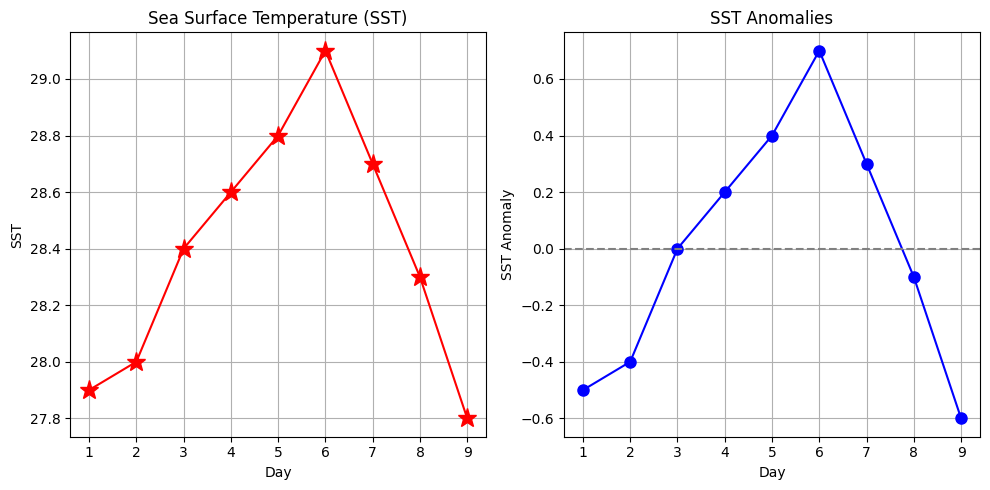

In [26]:
# Q3.3
import numpy as np
import matplotlib.pyplot as plt
days=np.array([1,2,3,4,5,6,7,8,9])

SST=np.array(sst)
SST_anomaly=compute_anomaly(SST)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(days,sst,marker='*',markersize=14,color='red')
plt.xlabel("Day")
plt.ylabel("SST")
plt.title("Sea Surface Temperature (SST)")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(days, SST_anomaly, marker='o', markersize=8, color='blue')
plt.axhline(0, color='gray', linestyle='--') # Horizontal zero line
plt.xlabel("Day")
plt.ylabel("SST Anomaly")
plt.title("SST Anomalies")
plt.grid()

plt.tight_layout()
plt.show()

---
# **Section 4 — NetCDF + xarray: Remote Sensing Dataset (Notebook 04)**

A small SST NetCDF file will be downloaded automatically.



In [ ]:
# Auto-download NetCDF file
import requests, os

url = "https://raw.githubusercontent.com/EarthSystem-Science-Lab/python-basics/main/data/data_sst.nc"
local = "data_sst.nc"

if not os.path.exists(local):
    r = requests.get(url)
    open(local,"wb").write(r.content)

ds = xr.open_dataset(local)
ds

### **Q4.1 — Dataset Exploration**  
Print:
- Dimensions  
- Coordinates  
- Variables  
- Global attributes  


In [ ]:
# Q4.1



### **Q4.2 — Statistics on `sst`**  
Compute and print:
- Global mean  
- Min  
- Max  


In [ ]:
# Q4.2


### **Q4.3 — Time-Mean Map**  
1. Compute `sst_mean_time = ds.sst.mean(dim='time')`  
2. Plot a colour map (lat vs lon)  
3. Add labels, title, and colorbar  



In [ ]:
# Q4.3


### **Q4.4 — Time Series at a Point**  
Choose a latitude & longitude inside file domain.  
Extract nearest time series and plot it.

Add axis labels and title.


In [ ]:
# Q4.4


---
# **Section 5 — Capstone Scientific Interpretation**  

Write **10–12 sentences** answering:

1. What spatial patterns do you observe in your time-mean SST map?  
2. Does the time series at your chosen point indicate warming/cooling or variability?  
3. What physical processes (mixing, stratification, insolation, currents, monsoon) could explain the patterns?  
4. How do your anomaly results relate to the NetCDF dataset behavior?  
5. How would these methods apply to real satellite (Sentinel-3/OLCI) or Argo data?

Write your answer below.


*Write your full scientific interpretation here.*